# Creating Statistical Models

### Data Preparation for Statistical Modeling

This task involves loading the airquality dataset, assessing missing values, creating a cleaned dataset by removing rows with missing data, and exploring the structure of the cleaned dataset to ensure data quality for statistical analysis.

In [5]:
library(mosaic)
library(ggplot2)
data(airquality)
head(airquality)


,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6


In [6]:
brak<-sum(is.na(airquality))
brak
new_airquality <- na.omit(airquality) #bez NA
str(new_airquality)                


[1] 44

'data.frame':	111 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 23 19 8 16 11 14 ...
 $ Solar.R: int  190 118 149 313 299 99 19 256 290 274 ...
 $ Wind   : num  7.4 8 12.6 11.5 8.6 13.8 20.1 9.7 9.2 10.9 ...
 $ Temp   : int  67 72 74 62 65 59 61 69 66 68 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 7 8 9 12 13 14 ...
 - attr(*, "na.action")= 'omit' Named int [1:42] 5 6 10 11 25 26 27 32 33 34 ...
  ..- attr(*, "names")= chr [1:42] "5" "6" "10" "11" ...


### Ozone Levels Analysis by Wind Speed

This task visualizes ozone levels with a boxplot while excluding outliers, computes the average ozone level for different wind speeds using the mosaic package and the aggregate() function, and displays the results in a line chart with points representing the averages.

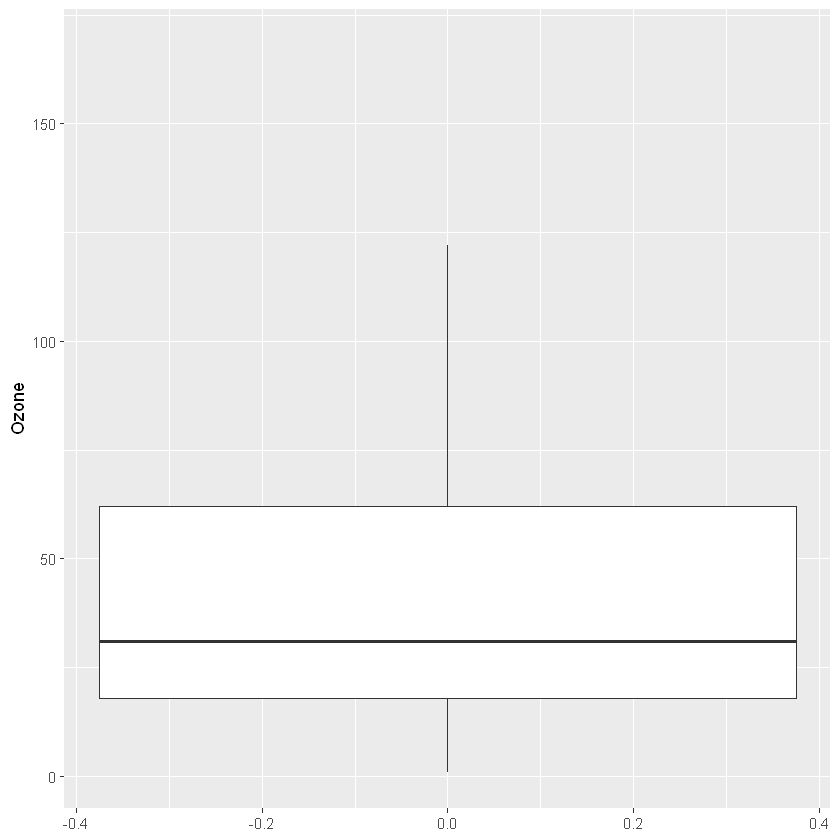

In [11]:
ggplot(new_airquality, aes(y = Ozone)) +
  geom_boxplot(outlier.shape = NA)  #nie wysweitalja sie wartosci odstające

In [12]:
mean_ozone_month<-mosaic::mean(Ozone~Wind,data=new_airquality)

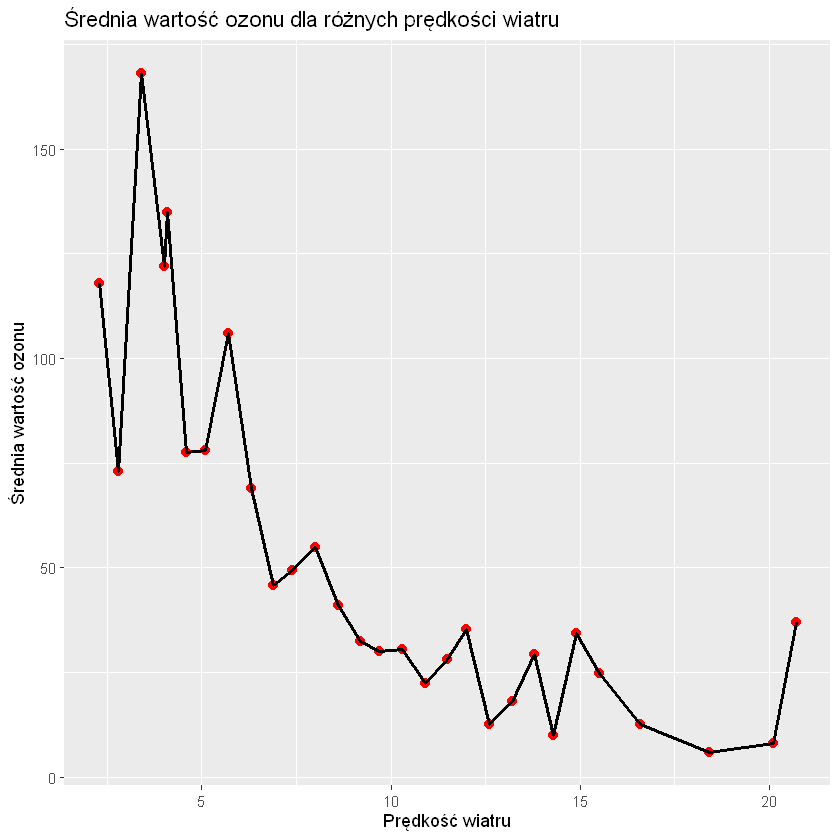

In [13]:
mean_ozone_month_2<-aggregate(Ozone~Wind,data=new_airquality,FUN=mean)

ggplot(data=mean_ozone_month_2, mapping=aes(x=Wind,y=Ozone)) +
  geom_point(color="red", size=2.5) + 
  geom_line(color="black",linewidth=1.1) +
  labs(title="Średnia wartość ozonu dla różnych prędkości wiatru",x="Prędkość wiatru",y="Średnia wartość ozonu")


In [14]:
new_airquality<-mutate(new_airquality, Temp=(5/9)*(Temp-32))
print(round(new_airquality,2))


    Ozone Solar.R Wind  Temp Month Day
1      41     190  7.4 19.44     5   1
2      36     118  8.0 22.22     5   2
3      12     149 12.6 23.33     5   3
4      18     313 11.5 16.67     5   4
7      23     299  8.6 18.33     5   7
8      19      99 13.8 15.00     5   8
9       8      19 20.1 16.11     5   9
12     16     256  9.7 20.56     5  12
13     11     290  9.2 18.89     5  13
14     14     274 10.9 20.00     5  14
15     18      65 13.2 14.44     5  15
16     14     334 11.5 17.78     5  16
17     34     307 12.0 18.89     5  17
18      6      78 18.4 13.89     5  18
19     30     322 11.5 20.00     5  19
20     11      44  9.7 16.67     5  20
21      1       8  9.7 15.00     5  21
22     11     320 16.6 22.78     5  22
23      4      25  9.7 16.11     5  23
24     32      92 12.0 16.11     5  24
28     23      13 12.0 19.44     5  28
29     45     252 14.9 27.22     5  29
30    115     223  5.7 26.11     5  30
31     37     279  7.4 24.44     5  31
38     29     127  9.7 27

### Linear Regression Models by Month

This task involves creating linear regression models for each month, where ozone levels predict temperature (in Celsius). The coefficients (intercept and slope) and the coefficient of determination (R²) are calculated and stored in a data frame for each model.

In [19]:
monthly<-split(new_airquality,new_airquality$Month)


df<-data.frame(Miesiąc=integer(),Wyraz_wolny=double(),Współczynnik_kierunkowy=double(),Współczynnik_determinacji=double())

for (m in names(monthly)) 
{
  model<-lm(Temp~Ozone,data=monthly[[m]])
  wolny<-coef(model)[1] #wyraz wolny to 1 kolumna regresji
  kierunkowy<-coef(model)[2] #kierunkowy to 2
  determinacji<-summary(model)$r.squared #z podsumowania statystycznego regresji bierzemy wspolczynnik determinacji
  #dodanie danych
  df<-rbind(df,data.frame(Miesiąc=as.numeric(m), Wyraz_wolny=wolny,
                          Współczynnik_kierunkowy=kierunkowy, Współczynnik_determinacji=determinacji))
  row.names(df)<-NULL  #usuwa nazwy wierszy
}
View(df)


Miesiąc,Wyraz_wolny,Współczynnik_kierunkowy,Współczynnik_determinacji
<dbl>,<dbl>,<dbl>,<dbl>
5,16.76414,0.09862721,0.3751814
6,20.97240,0.15984732,0.4466764
7,25.49429,0.05633893,0.5222987
8,25.31091,0.05681489,0.3666165
9,19.84612,0.16205699,0.6858359
